## 데이터 정제

In [1]:
import pandas as pd
import numpy as np

col_dict = {}
year_list = [2015, 2016, 2017, 2018]

# 컬럼명 통일 위한 for문
for year in year_list:
    col_dict[year] = []
    col_dict[year].append(year)
    for mon in range(1, 13):
        if mon < 10:
            col_dict[year].append('0' + str(mon) + '월')
        else:
            col_dict[year].append(str(mon) + '월')

# 2015, 2016, 2017, 2018년 데이터 들어간 dict            
datasets = {}

for year in year_list:
    # 컬럼명 통일 위한 list
    colnames = ['시도', '군구', '관광지', '구분', '세부구분', '내/외국인', '총계', 
                '년도', col_dict[year][1], col_dict[year][2],
                col_dict[year][3], col_dict[year][4], col_dict[year][5],
                col_dict[year][6], col_dict[year][7], col_dict[year][8],
                col_dict[year][9], col_dict[year][10], col_dict[year][11],
                col_dict[year][12]]
    
    datasets[year] = pd.read_excel('data/%d 주요관광지점 입장객 통계(전국).xls' %year, header=[0, 1],
                                   sheet_name=None)
    
    # 2015, 2016과 2017, 2018 파일의 sheet 구성이 달라서 따로 처리
    if year in [2015, 2016]:
        temp_df = pd.DataFrame()
        for city in datasets[year].values():
            city_df = pd.DataFrame(city)
            city_df.columns = colnames
            temp_df = pd.concat([temp_df, pd.DataFrame(city)], axis=0, join='outer')
        temp_df.reset_index(inplace=True)
        temp_df.년도 =col_dict[year][0]
        datasets[year] = temp_df
    else:
        temp_df = pd.DataFrame(list(datasets[year].values())[0])
        temp_df.columns = colnames
        temp_df.reset_index(inplace=True)
        temp_df.년도 =col_dict[year][0]
        datasets[year] = temp_df
 
# 통합 데이터
total_data = pd.concat([datasets[2015], datasets[2016], 
                        datasets[2017], datasets[2018]], 
                        axis=0, join='outer')
total_data.reset_index(inplace=True)
total_data.drop(['level_0', 'index'], axis=1, inplace=True)
total_data

,시도,군구,관광지,구분,세부구분,내/외국인,총계,년도,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,12월
0,서울특별시,종로구,경복궁,유료,측정,내국인,"3,347,046",2015,"196,594","264,154","272,022","406,906","485,936","155,024","140,930","265,302","387,816","403,641","219,760","148,961"
1,서울특별시,종로구,경복궁,유료,측정,외국인,"1,714,487",2015,"108,087","154,280","114,092","209,980","185,212","31,822","78,117","126,031","145,280","203,207","188,000","170,379"
2,서울특별시,종로구,경복궁,유료,측정,합계,"5,061,533",2015,"304,681","418,434","386,114","616,886","671,148","186,846","219,047","391,333","533,096","606,848","407,760","319,340"
3,서울특별시,종로구,종묘,유료,측정,내국인,"222,228",2015,"9,854","15,102","10,717","16,470","52,123","6,964","15,124","17,971","16,808","21,238","24,921","14,936"
4,서울특별시,종로구,종묘,유료,측정,외국인,"54,505",2015,"3,112","4,171","5,525","5,290","8,860","2,832","2,927","3,594","4,506","5,519","4,763","3,406"
5,서울특별시,종로구,종묘,유료,측정,합계,"276,733",2015,"12,966","19,273","16,242","21,760","60,983","9,796","18,051","21,565","21,314","26,757","29,684","18,342"
6,서울특별시,종로구,창경궁,유료,측정,내국인,"807,487",2015,"24,256","51,984","111,070","82,310","107,728","19,369","64,166","90,527","54,612","113,075","61,218","27,172"
7,서울특별시,종로구,창경궁,유료,측정,외국인,"41,602",2015,"1,326","1,487","5,526","5,862","5,453","1,890","4,676","3,054","3,503","3,936","3,106","1,783"
8,서울특별시,종로구,창경궁,유료,측정,합계,"849,089",2015,"25,582","53,471","116,596","88,172","113,181","21,259","68,842","93,581","58,115","117,011","64,324","28,955"
9,서울특별시,종로구,창덕궁,유료,측정,내국인,"1,226,217",2015,"49,390","58,745","63,273","140,398","187,128","39,425","109,725","102,114","100,310","189,933","126,038","59,738"


## 데이터 탐색

In [2]:
# 년도별 데이터 수, 결측치 확인

for year in year_list:
    print('-' * 10, year, '-' * 10)
    print(datasets[year].info())

print(total_data.info())
    
# 년도마다 data 개수 다름    
# 2015: 4,247건. null값 없음.
# 2016: 4,772건. null값 없음.
# 2017: 5,271건. null값 없음.
# 2018: 5,635건. null값 없음.
# total: 19925건. null값 없음.
# => 관광지 매년 증가하는 추세(한 관광지가 2개 or 3개의 row 차지한다는 점 유의)

---------- 2015 ----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4247 entries, 0 to 4246
Data columns (total 21 columns):
index    4247 non-null int64
시도       4247 non-null object
군구       4247 non-null object
관광지      4247 non-null object
구분       4247 non-null object
세부구분     4247 non-null object
내/외국인    4247 non-null object
총계       4247 non-null object
년도       4247 non-null int64
01월      4247 non-null object
02월      4247 non-null object
03월      4247 non-null object
04월      4247 non-null object
05월      4247 non-null object
06월      4247 non-null object
07월      4247 non-null object
08월      4247 non-null object
09월      4247 non-null object
10월      4247 non-null object
11월      4247 non-null object
12월      4247 non-null object
dtypes: int64(2), object(19)
memory usage: 696.9+ KB
None
---------- 2016 ----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4772 entries, 0 to 4771
Data columns (total 21 columns):
index    4772 non-null int64
시도       4772 non

In [3]:
# 년도별 시도, 군구별 관광지 수 value counts 측정
# top 5만 뽑아봄

for year in year_list:
    print('-' * 10, year, '-' * 10)
    print(datasets[year].시도.value_counts().head(5))
    print(datasets[year].군구.value_counts().head(5))
    
print(total_data.시도.value_counts().head(5))
print(total_data.군구.value_counts().head(5))
        
# 경기도, 강원도, 전라남도, 경상북도, 경상남도 5개 매년 공통. 순위만 조금 차이 
# 군구별로 보면,
# 2015년 : 여수, 용인, 춘천, 거제, 안성
# 2016년 : 여수, 춘천, 용인, 거제, 평창
# 2017년 : 여수, 춘천, 평창, 용인, 거제
# 2018년 : 춘천, 평창, 용인, 거제, 안동

# 전체 데이터
# 경기도, 전라남도, 강원도, 경상북도, 경상남도 순
# 여수, 춘천, 용인, 평창, 거제 순

---------- 2015 ----------
경기도     697
강원도     661
전라남도    615
경상북도    530
경상남도    410
Name: 시도, dtype: int64
여수시    117
용인시     99
춘천시     96
거제시     95
안성시     88
Name: 군구, dtype: int64
---------- 2016 ----------
경기도     838
강원도     703
전라남도    688
경상북도    597
경상남도    419
Name: 시도, dtype: int64
여수시    117
춘천시    111
용인시     96
거제시     95
평창군     94
Name: 군구, dtype: int64
---------- 2017 ----------
경기도     882
전라남도    794
강원도     707
경상북도    702
경상남도    435
Name: 시도, dtype: int64
여수시    119
춘천시    109
평창군    100
용인시     96
거제시     95
Name: 군구, dtype: int64
---------- 2018 ----------
경기도     905
전라남도    866
경상북도    776
강원도     712
경상남도    474
Name: 시도, dtype: int64
춘천시    109
평창군    101
용인시     96
거제시     95
안동시     91
Name: 군구, dtype: int64
경기도     3322
전라남도    2963
강원도     2783
경상북도    2605
경상남도    1738
Name: 시도, dtype: int64
여수시    443
춘천시    425
용인시    387
평창군    382
거제시    380
Name: 군구, dtype: int64


In [4]:
# 총계, 월별 총계 데이터가 object이므로, 숫자형으로 변환
# 숫자 사이에 있는 ',' 제거하고 '-'를 0으로 바꿔서 int형으로 변환
cols = ['총계', '01월', '02월', '03월', '04월',
        '05월', '06월', '07월', '08월', '09월',
        '10월', '11월', '12월']

for year in year_list:
    datasets[year][cols] = datasets[year][cols].replace({',': '', '-': '0'}, regex=True)
    datasets[year][cols] = datasets[year][cols].astype(int)
    
total_data[cols] = total_data[cols].replace({',': '', '-': '0'}, regex=True)
total_data[cols] = total_data[cols].astype(int)

In [5]:
# 변경 확인

for year in year_list:
    print('-' * 10, year, '-' * 10)
    print(datasets[year].info())

print('-' * 10, 'total', '-' * 10)    
print(total_data.info())

---------- 2015 ----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4247 entries, 0 to 4246
Data columns (total 21 columns):
index    4247 non-null int64
시도       4247 non-null object
군구       4247 non-null object
관광지      4247 non-null object
구분       4247 non-null object
세부구분     4247 non-null object
내/외국인    4247 non-null object
총계       4247 non-null int32
년도       4247 non-null int64
01월      4247 non-null int32
02월      4247 non-null int32
03월      4247 non-null int32
04월      4247 non-null int32
05월      4247 non-null int32
06월      4247 non-null int32
07월      4247 non-null int32
08월      4247 non-null int32
09월      4247 non-null int32
10월      4247 non-null int32
11월      4247 non-null int32
12월      4247 non-null int32
dtypes: int32(13), int64(2), object(6)
memory usage: 481.2+ KB
None
---------- 2016 ----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4772 entries, 0 to 4771
Data columns (total 21 columns):
index    4772 non-null int64
시도       4772 non-nu

In [6]:
total_data.to_csv('2015-2018 관광지 데이터 합계.csv')

In [68]:
import matplotlib

matplotlib.rcParams['font.family'].insert(0, 'Malgun Gothic')

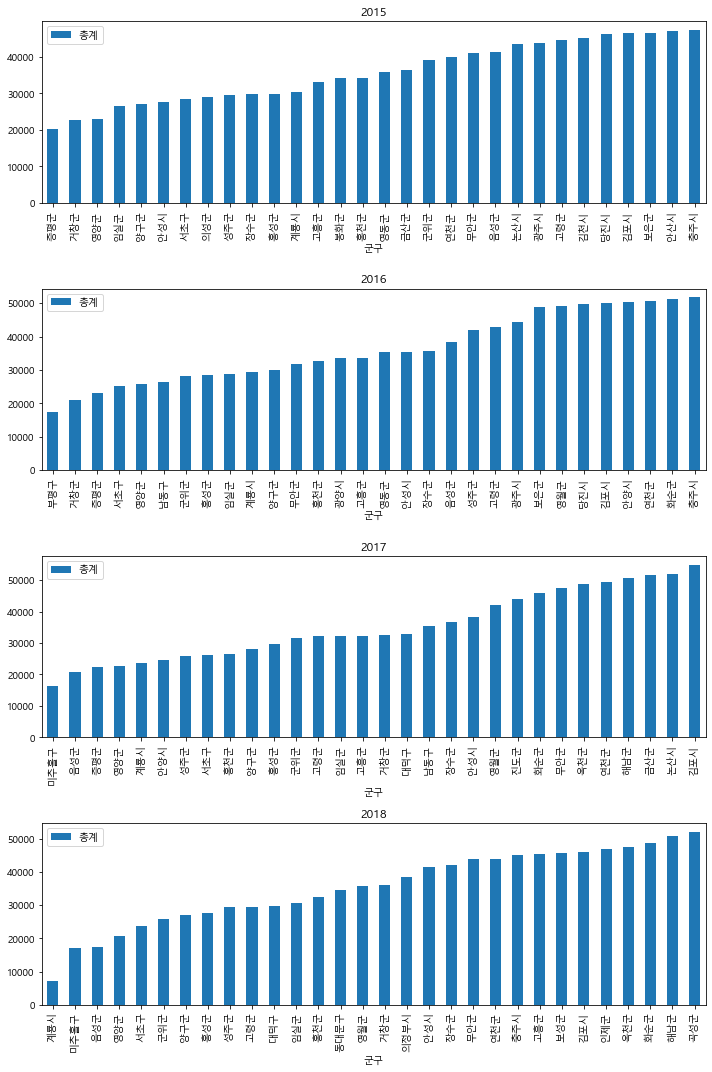

In [123]:
# 년도별 각 구의 평균 방문량 top 30 분석

%matplotlib inline

mean_visited_list = []

for year in year_list:
    temp_df = datasets[year].pivot_table(index='군구',
                                         aggfunc='mean',
                                         values='총계')
    temp_df.sort_values(by='총계', inplace=True)
    mean_visited_list.append(temp_df.head(30))

fig, axes = plt.subplots(4, 1)

for i in range(4):
    mean_visited_list[i].plot(kind='bar', ax=axes[i], figsize=(10, 15))
    axes[i].set_title(str(year_list[i]))
    
fig.subplots_adjust()    
fig.tight_layout()
plt.show()

In [19]:
# 년도별 각 구의 평균 방문량 top 30 분석

%matplotlib inline

mean_visited_list = []

for year in year_list:
    temp_df = datasets[year].pivot_table(index='군구',
                                         aggfunc='mean',
                                         values='총계')
    temp_df.sort_values(by='총계', inplace=True)
    mean_visited_list.append(temp_df.head(30))

diff = mean_visited_list[2].sub(mean_visited_list[1], fill_value=0).sort_values(by='총계')

print(diff.head(5))
print(diff.tail(5))

               총계
군구               
충주시 -51728.470588
당진시 -49771.066667
보은군 -48730.238095
광주시 -44298.787879
영동군 -35259.750000
               총계
군구               
진도군  44089.391304
옥천군  48810.222222
해남군  50765.882353
금산군  51719.666667
논산시  51834.000000
